In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
%matplotlib inline

In [3]:
data = pd.read_csv(r'ads_data.csv')

Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

In [4]:
data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [5]:
clients = pd.read_csv(r'ads_clients_data.csv')

In [6]:
clients

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [66]:
clients.date.nunique()

1

In [8]:
data_1 = data.groupby(['ad_id', 'event'], as_index= False).agg({'date': 'count'})

In [9]:
data_1

,ad_id,event,date
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [14]:
data_2 = data_1.pivot(index='ad_id', columns='event', values='date')

In [15]:
data_2

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,NaN,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,NaN,156.0
122023,NaN,68.0


In [18]:
data_3 = data_2.fillna(0)

In [19]:
data_3

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [22]:
data_3.mean().round()

event
click    113.0
view     923.0
dtype: float64

Давайте посмотрим на распределение показов объявлений!

    По оси x – число показов
    По оси y – доля объявлений с такими показами

Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения. Выберите соответствующий график:

In [24]:
data_1 

,ad_id,event,date
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [25]:
data_4 = data_1.query('event == "view"')

In [26]:
data_4

,ad_id,event,date
1,2,view,101
3,3,view,184
5,1902,view,41
6,2064,view,35
8,2132,view,58
...,...,...,...
1475,122004,view,100
1476,122013,view,156
1477,122023,view,68
1479,122031,view,138


In [29]:
log = np.log(data_4.date)

In [30]:
log

1       4.615121
3       5.214936
5       3.713572
6       3.555348
8       4.060443
          ...   
1475    4.605170
1476    5.049856
1477    4.219508
1479    4.927254
1480    3.737670
Name: date, Length: 956, dtype: float64

In [31]:
data_4['log'] = log

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
data_4

,ad_id,event,date,log
1,2,view,101,4.615121
3,3,view,184,5.214936
5,1902,view,41,3.713572
6,2064,view,35,3.555348
8,2132,view,58,4.060443
...,...,...,...,...
1475,122004,view,100,4.605170
1476,122013,view,156,5.049856
1477,122023,view,68,4.219508
1479,122031,view,138,4.927254


In [33]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


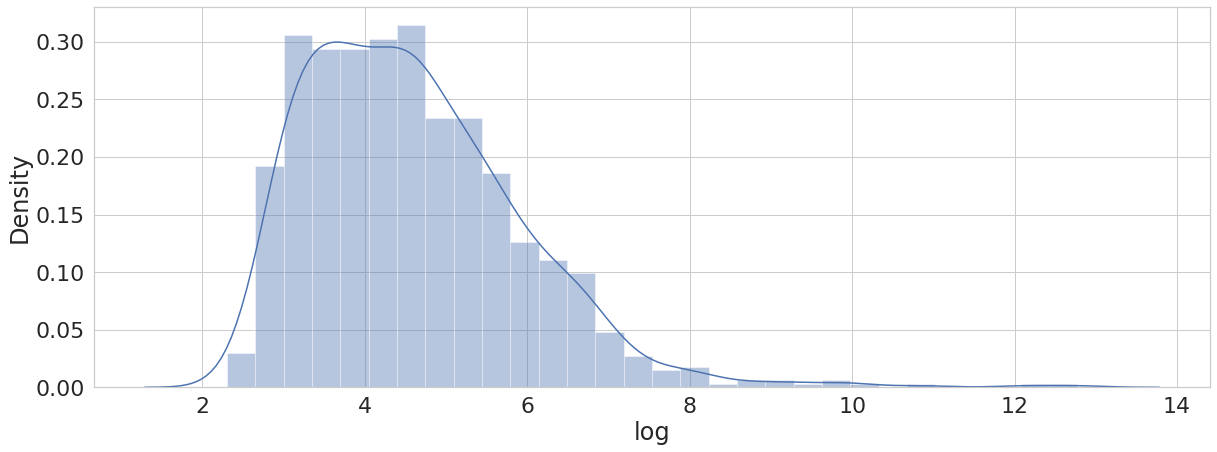

In [35]:
sns.distplot(data_4.log)

Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [37]:
data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [43]:
days = data.query('event == "view"').groupby(['ad_id', 'date'], as_index = False).agg({'time': 'count'})

In [44]:
days

,ad_id,date,time
0,2,2019-04-01,83
1,2,2019-04-02,18
2,3,2019-04-01,158
3,3,2019-04-02,26
4,1902,2019-04-03,34
...,...,...,...
1926,122023,2019-04-05,15
1927,122031,2019-04-05,119
1928,122031,2019-04-06,19
1929,122078,2019-04-03,36


In [53]:
days_1 = days.groupby('date', as_index = False).agg({'time': 'mean'})

In [54]:
days_1

,date,time
0,2019-04-01,154.482270
1,2019-04-02,137.786982
2,2019-04-03,163.952778
3,2019-04-04,675.901720
4,2019-04-05,919.109677
5,2019-04-06,277.122727


In [59]:
rol = days_1.time.rolling(2).mean().round()

In [60]:
days_1['rol'] = rol

In [61]:
days_1

,date,time,rol
0,2019-04-01,154.482270,NaN
1,2019-04-02,137.786982,146.0
2,2019-04-03,163.952778,151.0
3,2019-04-04,675.901720,420.0
4,2019-04-05,919.109677,798.0
5,2019-04-06,277.122727,598.0


Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

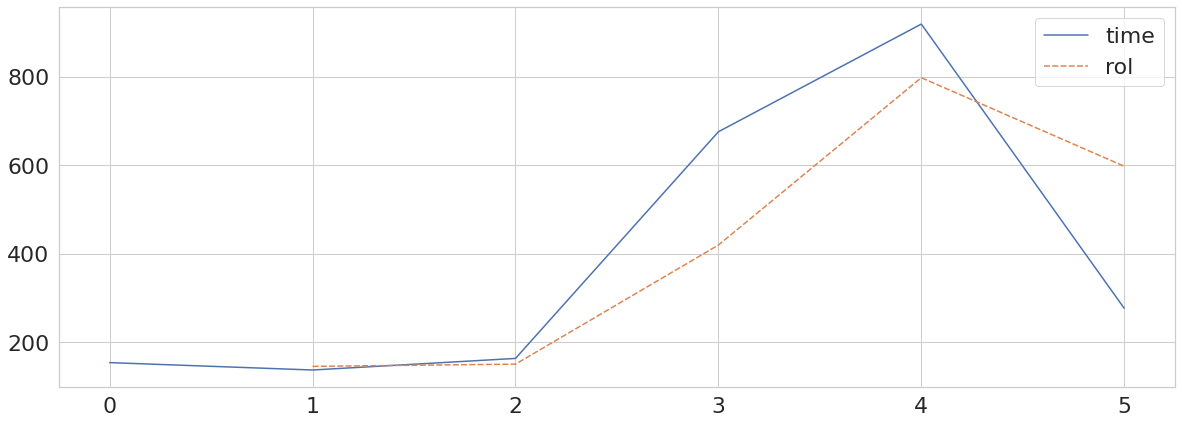

In [62]:
sns.lineplot(data = days_1)


In [63]:
days_1.dropna()

,date,time,rol
1,2019-04-02,137.786982,146.0
2,2019-04-03,163.952778,151.0
3,2019-04-04,675.901720,420.0
4,2019-04-05,919.109677,798.0
5,2019-04-06,277.122727,598.0


In [65]:
abs(days_1.time - days_1.rol)

0           NaN
1      8.213018
2     12.952778
3    255.901720
4    121.109677
5    320.877273
dtype: float64